In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np

In [76]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [37]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [38]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [39]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [40]:
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [41]:
# Assign the station class to a variable called `Station`
Station = Base.classes.station

In [42]:
# Create a session
session = Session(engine)

In [43]:
for row in session.query(Measurement, Measurement.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x10a8ad278>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x10a8fdcf8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x10a907438>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x10a907b38>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x10a911278>, 'USC00519397')


In [44]:
cdate = datetime.now()
beginDate = cdate.replace(cdate.year - 1)

In [45]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= beginDate).group_by(Measurement.date).all()
   

In [55]:
dates = [result[0] for result in results]
prcps = [result[1] for result in results]

In [73]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
# df.head(10)

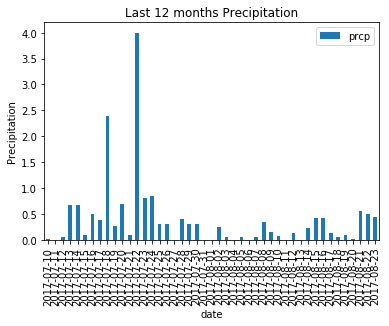

In [75]:
# df.plot().bar(title="Precp")
plt.figure();
df.plot(kind='bar');
plt.ylabel("Precipitation")
plt.title("Last 12 months Precipitation");

In [95]:
total_satitons_qry = "Select count(station) from station"
total_stations = conn.execute(total_satitons_qry)

In [96]:
total_stations.fetchall()[0]

(9,)

In [121]:
max_obs_station_qry = "select station, count(tobs) as num_obs from measurement group by station order by num_obs desc"

In [122]:
max_obs_station_result = conn.execute(max_obs_station_qry)

In [123]:
obs_pd = pd.DataFrame(max_obs_station_result.fetchall())

In [124]:
max_obs_station = obs_pd[0][0]

In [125]:
max_obs_station

'USC00519281'

In [182]:
temp_obs_qry = f"select tobs from measurement where date >= date('now', '-1 year') and station='{max_obs_station}'"
temp_obs_result = conn.execute(temp_obs_qry)

In [183]:
temp_obs_pd = pd.DataFrame(temp_obs_result.fetchall())

In [184]:
temp_obs_pd.max(), temp_obs_pd.min(), (temp_obs_pd.max() - temp_obs_pd.min())/6


(0    83.0
 dtype: float64, 0    69.0
 dtype: float64, 0    2.333333
 dtype: float64)

In [185]:
# temp_obs_pd

In [186]:
bins = [ 60, 65, 70, 75, 80, 85]
group_names = ['60', '65', '70', '75', '80']

In [187]:
temp_obs_pd['bin'] = pd.cut(temp_obs_pd[0], bins, labels=group_names)

In [188]:
temp_obs_sum = temp_obs_pd.groupby("bin").count()

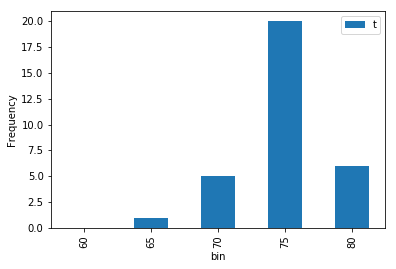

In [191]:
temp_obs_sum.plot(kind='bar');
plt.legend("tobs")
plt.ylabel("Frequency");